<a href="https://colab.research.google.com/github/Navjotkaur-243/CMP7239/blob/main/nsl_kdd_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSL-KDD Dataset Analysis and Visualization

This notebook provides comprehensive analysis and visualization of the NSL-KDD dataset, which is a refined version of the KDD Cup 1999 dataset used for network intrusion detection research.

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [54]:
# Define column names based on the ARFF file
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'difficulty_level'
]

In [55]:
# Load the training dataset
train_data = pd.read_csv('KDDTrain+.txt', names=column_names, header=None, sep=',', on_bad_lines='skip')
test_data = pd.read_csv('KDDTest+.txt', names=column_names, header=None, sep=',', on_bad_lines='skip')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"\nFirst few rows of training data:")
train_data.head()

Training data shape: (196640, 43)
Test data shape: (22544, 43)

First few rows of training data:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0,0.0,0.0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20.0
1,0.0,udp,other,SF,146.0,0.0,0,0,0.0,0.0,...,0.0,0.6,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
2,0.0,tcp,private,S0,0.0,0.0,0,0,0.0,0.0,...,0.1,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
3,0.0,tcp,http,SF,232.0,8153.0,0,0,0.0,0.0,...,1.0,0.0,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
4,0.0,tcp,http,SF,199.0,420.0,0,0,0.0,0.0,...,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0


In [56]:
# Basic dataset information
print("Dataset Info:")
print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Features: {len(column_names) - 2}")
print(f"\nMissing values in training data:")
print(train_data.isnull().sum().sum())
print(f"\nData types:")
train_data.dtypes

Dataset Info:
Training samples: 196640
Test samples: 22544
Features: 41

Missing values in training data:
186

Data types:


,0
duration,float64
protocol_type,object
service,object
flag,object
src_bytes,float64
dst_bytes,float64
land,object
wrong_fragment,object
urgent,float64
hot,float64


## 1. Class Distribution Analysis

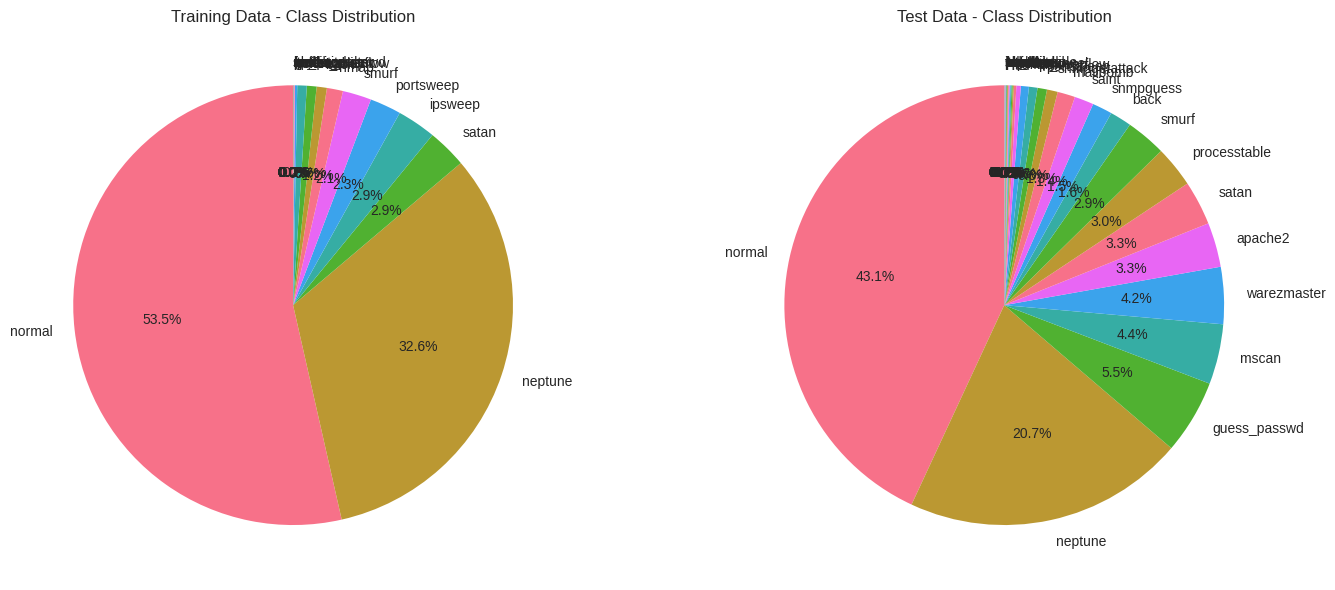

Training Data Class Distribution:
class
normal             105293
neptune             64182
satan                5679
ipsweep              5625
portsweep            4535
smurf                4153
nmap                 2325
back                 1473
teardrop             1404
warezclient          1367
pod                   326
guess_passwd           84
buffer_overflow        44
land                   32
warezmaster            28
imap                   17
loadmodule             15
ftp_write              13
rootkit                13
multihop                9
perl                    6
phf                     5
spy                     3
Name: count, dtype: int64

Test Data Class Distribution:
class
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb   

In [57]:
# Analyze class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training data class distribution
train_class_counts = train_data['class'].value_counts()
axes[0].pie(train_class_counts.values, labels=train_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Training Data - Class Distribution')

# Test data class distribution
test_class_counts = test_data['class'].value_counts()
axes[1].pie(test_class_counts.values, labels=test_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Test Data - Class Distribution')

plt.tight_layout()
plt.show()

print("Training Data Class Distribution:")
print(train_class_counts)
print("\nTest Data Class Distribution:")
print(test_class_counts)

## 2. Protocol Type Analysis

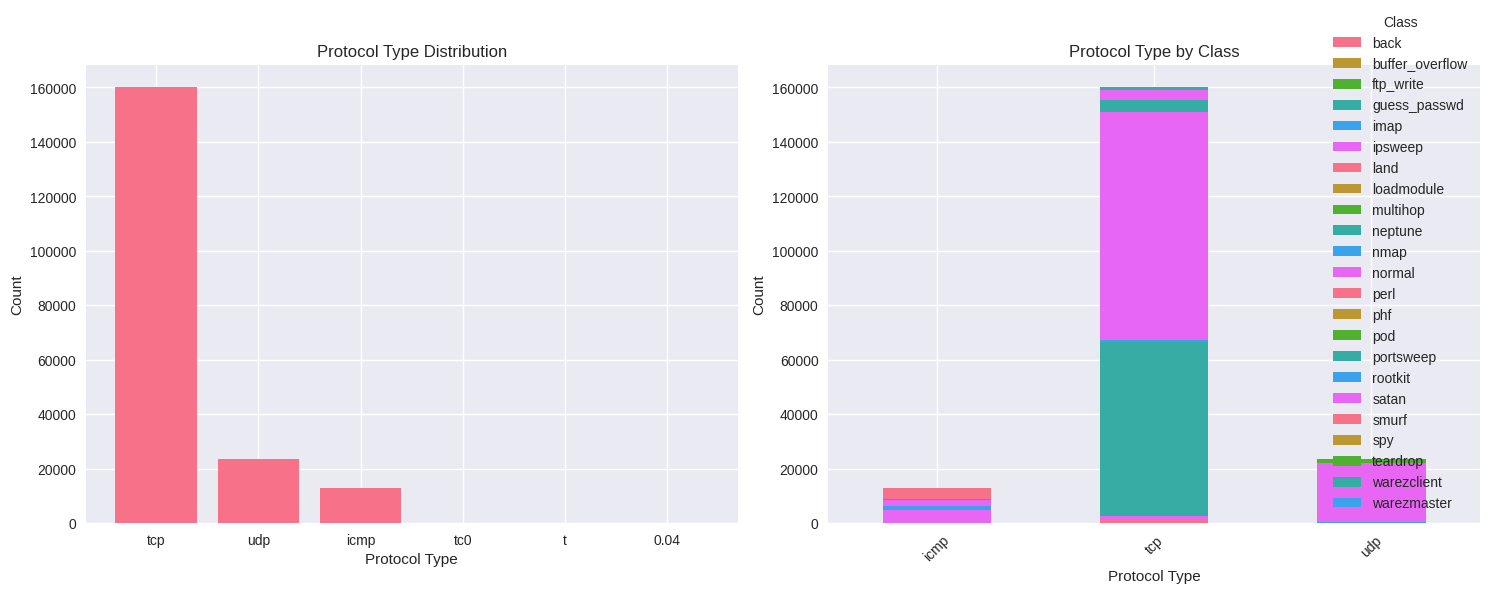

In [58]:
# Protocol type distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Overall protocol distribution
protocol_counts = train_data['protocol_type'].value_counts()
axes[0].bar(protocol_counts.index, protocol_counts.values)
axes[0].set_title('Protocol Type Distribution')
axes[0].set_xlabel('Protocol Type')
axes[0].set_ylabel('Count')

# Protocol type by class
protocol_class = pd.crosstab(train_data['protocol_type'], train_data['class'])
protocol_class.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('Protocol Type by Class')
axes[1].set_xlabel('Protocol Type')
axes[1].set_ylabel('Count')
axes[1].legend(title='Class')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Service Analysis

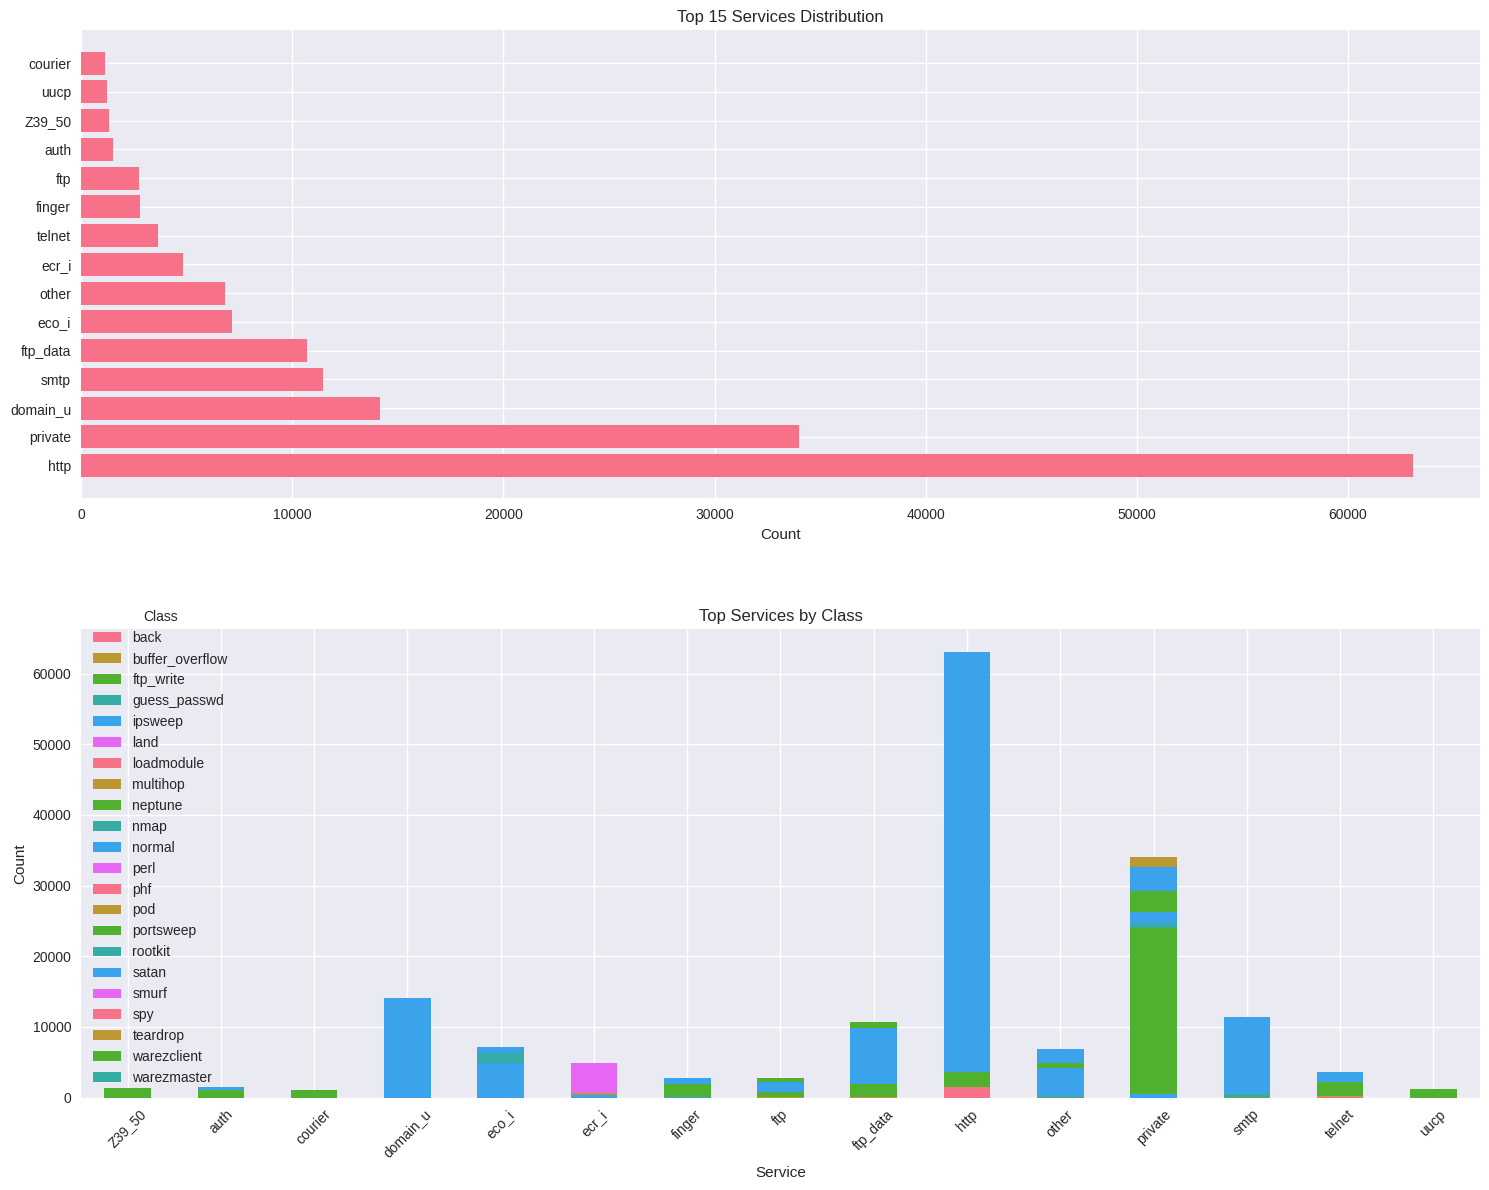

In [59]:
# Top 15 services analysis
top_services = train_data['service'].value_counts().head(15)

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Top services distribution
axes[0].barh(range(len(top_services)), top_services.values)
axes[0].set_yticks(range(len(top_services)))
axes[0].set_yticklabels(top_services.index)
axes[0].set_title('Top 15 Services Distribution')
axes[0].set_xlabel('Count')

# Service vs Class for top services
top_service_names = top_services.index
service_class_data = train_data[train_data['service'].isin(top_service_names)]
service_class_crosstab = pd.crosstab(service_class_data['service'], service_class_data['class'])
service_class_crosstab.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('Top Services by Class')
axes[1].set_xlabel('Service')
axes[1].set_ylabel('Count')
axes[1].legend(title='Class')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Connection Flag Analysis

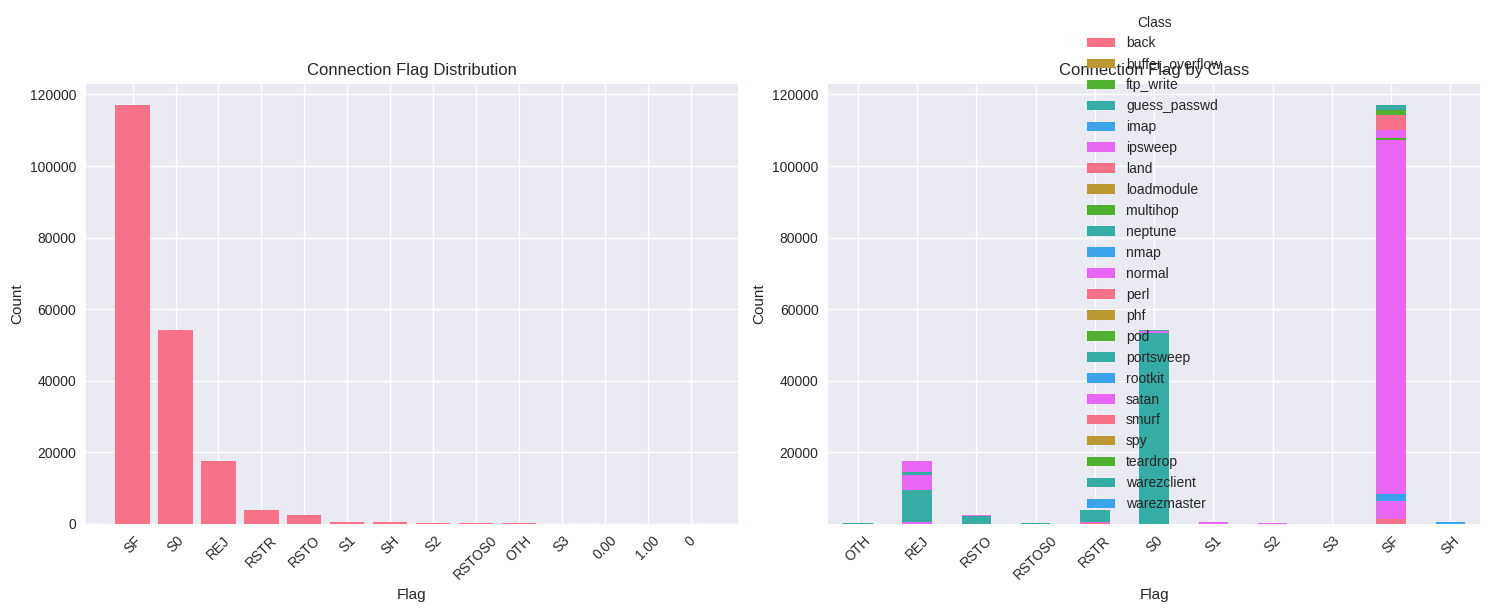

In [60]:
# Connection flag analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Flag distribution
flag_counts = train_data['flag'].value_counts()
axes[0].bar(flag_counts.index, flag_counts.values)
axes[0].set_title('Connection Flag Distribution')
axes[0].set_xlabel('Flag')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Flag by class
flag_class = pd.crosstab(train_data['flag'], train_data['class'])
flag_class.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('Connection Flag by Class')
axes[1].set_xlabel('Flag')
axes[1].set_ylabel('Count')
axes[1].legend(title='Class')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. Numerical Features Analysis

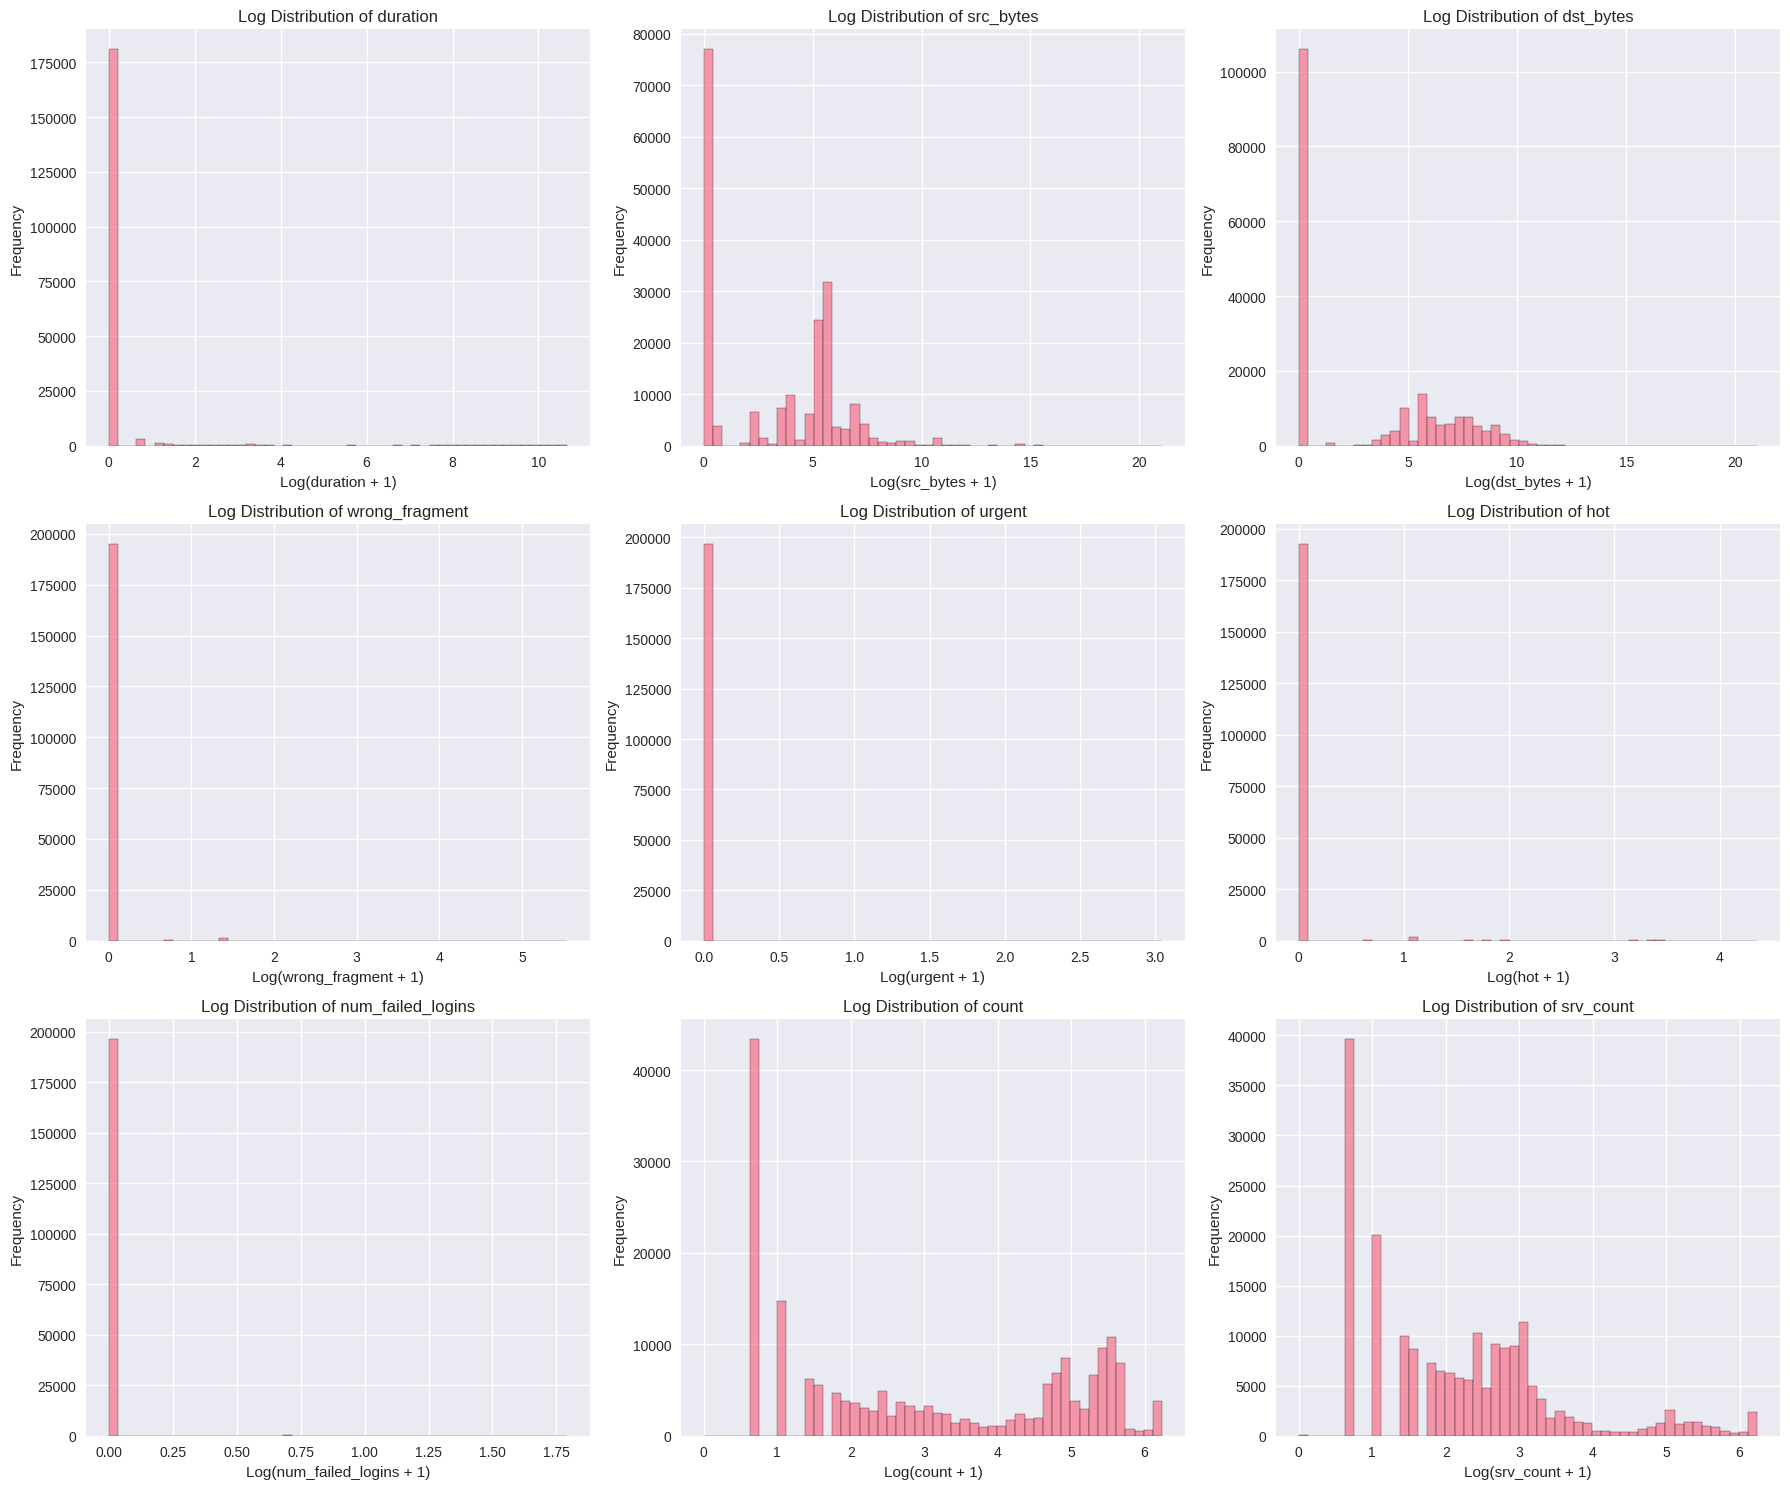

In [61]:
# Select numerical features for analysis
numerical_features = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent',
                     'hot', 'num_failed_logins', 'count', 'srv_count', 'serror_rate',
                     'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']

# Convert relevant columns to numeric, coercing errors
for feature in numerical_features:
    train_data[feature] = pd.to_numeric(train_data[feature], errors='coerce')

# Distribution of key numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, feature in enumerate(numerical_features[:9]):
    # Log transform for better visualization (add 1 to avoid log(0))
    data_to_plot = np.log1p(train_data[feature])
    axes[i].hist(data_to_plot.dropna(), bins=50, alpha=0.7, edgecolor='black') # Drop NaNs for plotting
    axes[i].set_title(f'Log Distribution of {feature}')
    axes[i].set_xlabel(f'Log({feature} + 1)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

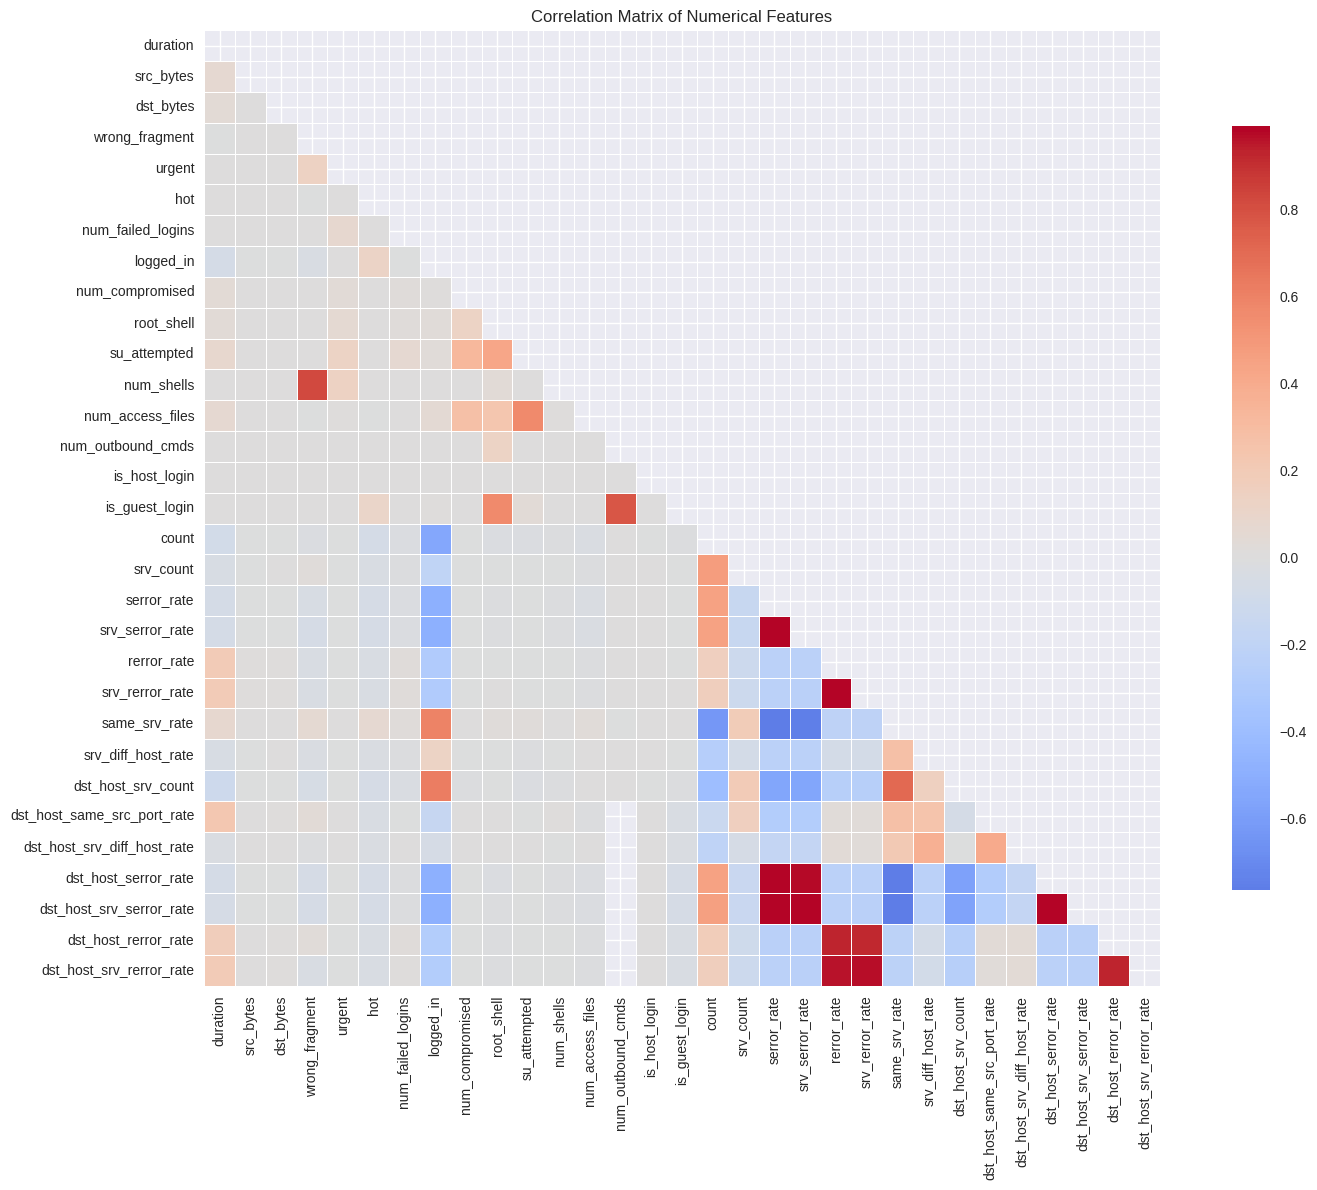

Highly correlated feature pairs (|correlation| > 0.8):
wrong_fragment - num_shells: 0.822
serror_rate - srv_serror_rate: 0.993
serror_rate - dst_host_serror_rate: 0.980
serror_rate - dst_host_srv_serror_rate: 0.981
srv_serror_rate - dst_host_serror_rate: 0.978
srv_serror_rate - dst_host_srv_serror_rate: 0.986
rerror_rate - srv_rerror_rate: 0.989
rerror_rate - dst_host_rerror_rate: 0.927
rerror_rate - dst_host_srv_rerror_rate: 0.965
srv_rerror_rate - dst_host_rerror_rate: 0.918
srv_rerror_rate - dst_host_srv_rerror_rate: 0.970
dst_host_serror_rate - dst_host_srv_serror_rate: 0.985
dst_host_rerror_rate - dst_host_srv_rerror_rate: 0.925


In [62]:
# Correlation matrix for numerical features
numerical_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
# Remove difficulty_level as it's not a feature
if 'difficulty_level' in numerical_cols:
    numerical_cols.remove('difficulty_level')

correlation_matrix = train_data[numerical_cols].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Show highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i],
                                  correlation_matrix.columns[j],
                                  correlation_matrix.iloc[i, j]))

print("Highly correlated feature pairs (|correlation| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

## 7. Bytes Transfer Analysis

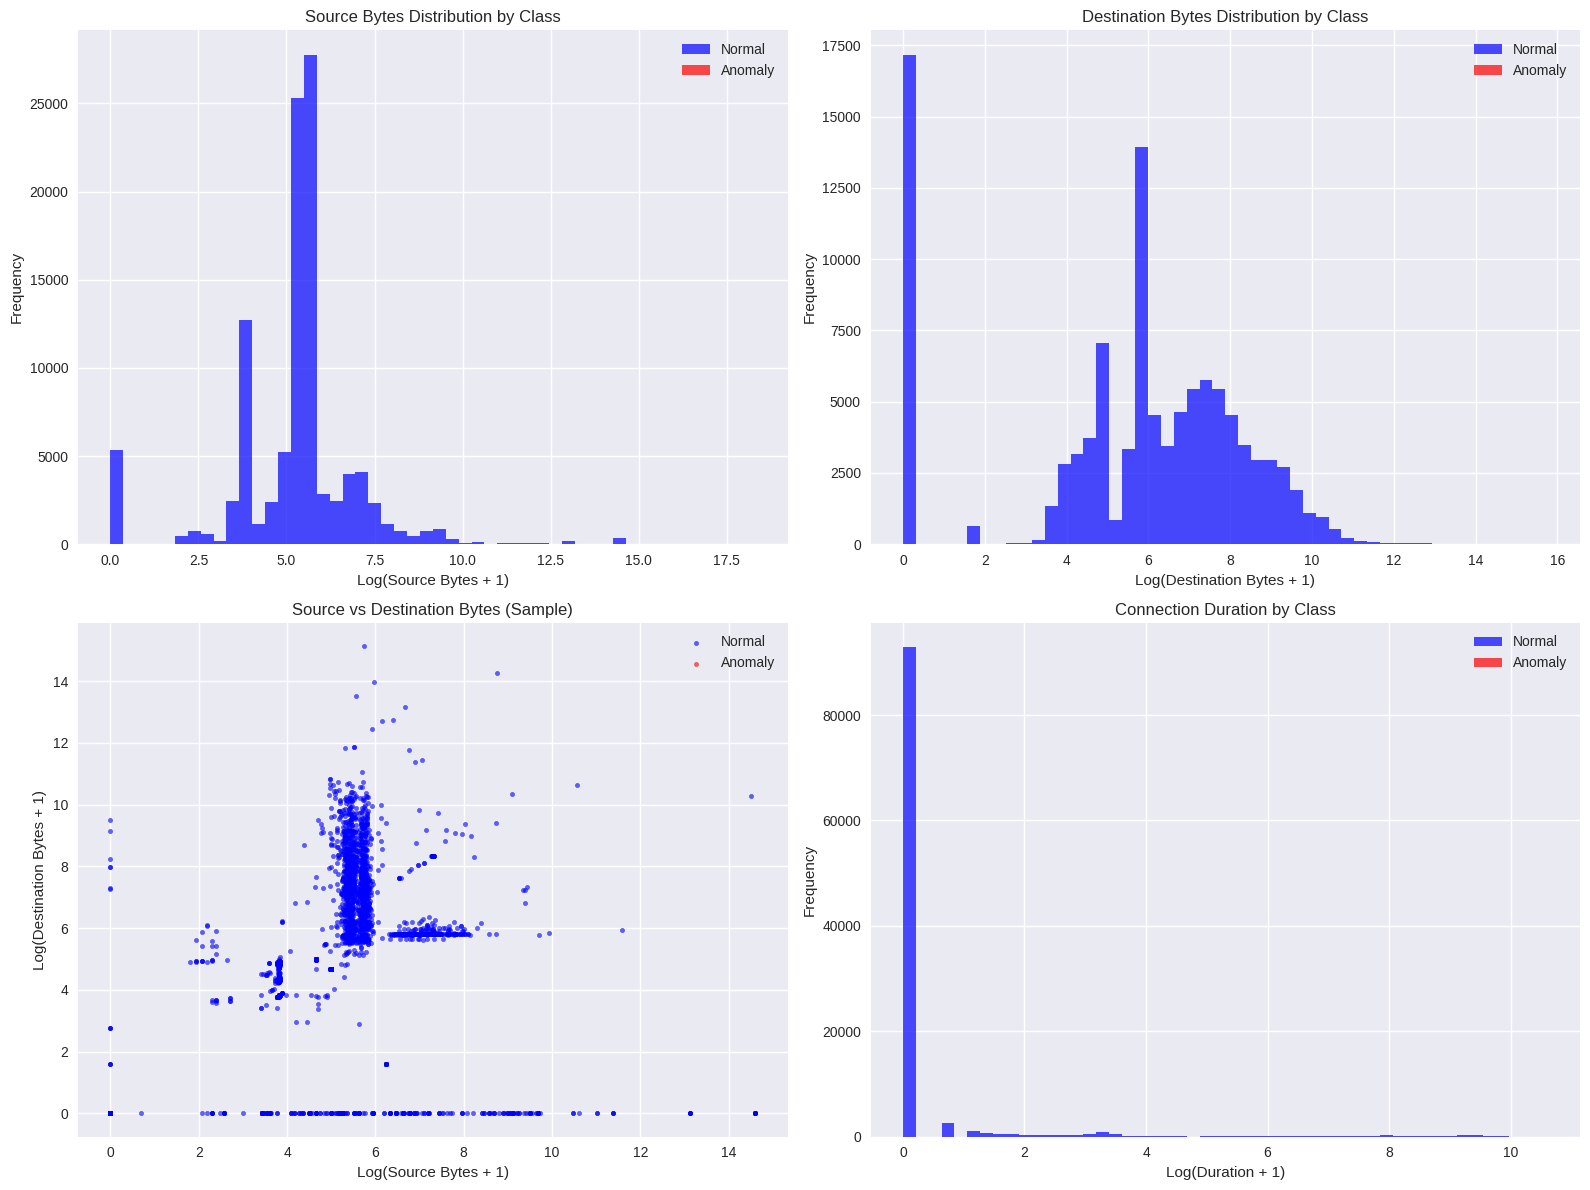

In [63]:
# Bytes transfer analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Source bytes by class
normal_data = train_data[train_data['class'] == 'normal']
anomaly_data = train_data[train_data['class'] == 'anomaly']

axes[0, 0].hist(np.log1p(normal_data['src_bytes']), bins=50, alpha=0.7, label='Normal', color='blue')
axes[0, 0].hist(np.log1p(anomaly_data['src_bytes']), bins=50, alpha=0.7, label='Anomaly', color='red')
axes[0, 0].set_title('Source Bytes Distribution by Class')
axes[0, 0].set_xlabel('Log(Source Bytes + 1)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Destination bytes by class
axes[0, 1].hist(np.log1p(normal_data['dst_bytes']), bins=50, alpha=0.7, label='Normal', color='blue')
axes[0, 1].hist(np.log1p(anomaly_data['dst_bytes']), bins=50, alpha=0.7, label='Anomaly', color='red')
axes[0, 1].set_title('Destination Bytes Distribution by Class')
axes[0, 1].set_xlabel('Log(Destination Bytes + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Scatter plot of src_bytes vs dst_bytes
sample_data = train_data.sample(n=5000, random_state=42)  # Sample for better visualization
normal_sample = sample_data[sample_data['class'] == 'normal']
anomaly_sample = sample_data[sample_data['class'] == 'anomaly']

axes[1, 0].scatter(np.log1p(normal_sample['src_bytes']), np.log1p(normal_sample['dst_bytes']),
                  alpha=0.6, label='Normal', s=10, color='blue')
axes[1, 0].scatter(np.log1p(anomaly_sample['src_bytes']), np.log1p(anomaly_sample['dst_bytes']),
                  alpha=0.6, label='Anomaly', s=10, color='red')
axes[1, 0].set_title('Source vs Destination Bytes (Sample)')
axes[1, 0].set_xlabel('Log(Source Bytes + 1)')
axes[1, 0].set_ylabel('Log(Destination Bytes + 1)')
axes[1, 0].legend()

# Duration analysis
axes[1, 1].hist(np.log1p(normal_data['duration']), bins=50, alpha=0.7, label='Normal', color='blue')
axes[1, 1].hist(np.log1p(anomaly_data['duration']), bins=50, alpha=0.7, label='Anomaly', color='red')
axes[1, 1].set_title('Connection Duration by Class')
axes[1, 1].set_xlabel('Log(Duration + 1)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()